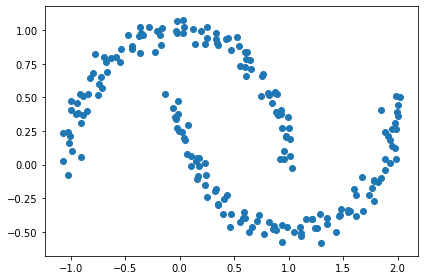

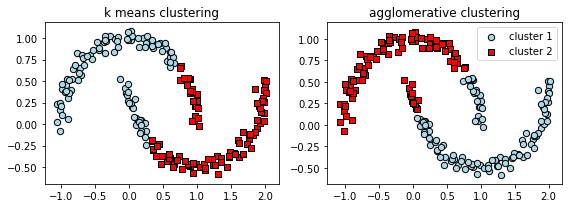

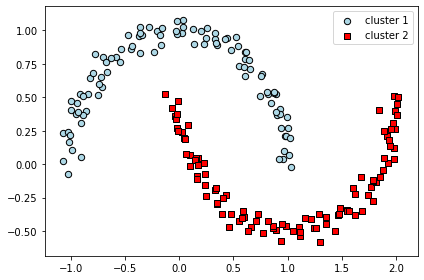

IndexError: index 9 is out of bounds for axis 0 with size 9

<Figure size 576x144 with 0 Axes>

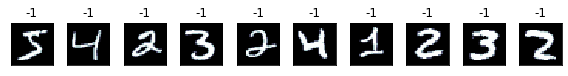

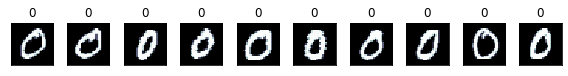

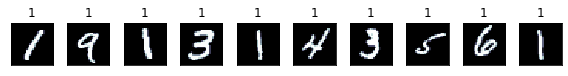

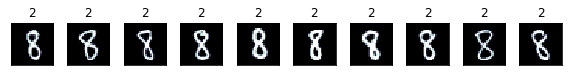

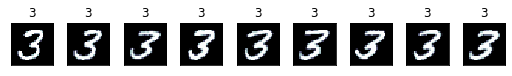

In [1]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA
import pickle

X, y = make_moons(n_samples=200,noise=0.05,random_state=0)
plt.scatter(X[:,0],X[:,1])
plt.tight_layout()
plt.show()

f, (ax1, ax2)=plt.subplots(1,2,figsize=(8,3))

km=KMeans(n_clusters=2,random_state=0)
y_km=km.fit_predict(X)
ax1.scatter(X[y_km==0,0],X[y_km==0,1],
            edgecolor='black',
            c='lightblue',marker='o',s=40,label='cluster 1'
            )
ax1.scatter(X[y_km==1,0],X[y_km==1,1],
            edgecolor='black',
            c='red',marker='s',s=40,label='cluster 2'
            )
ax1.set_title('k means clustering')

ac=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='complete')
y_ac=ac.fit_predict(X)
ax2.scatter(X[y_ac==0,0],X[y_ac==0,1],
            edgecolor='black',
            c='lightblue',marker='o',s=40,label='cluster 1'
            )
ax2.scatter(X[y_ac==1,0],X[y_ac==1,1],
            edgecolor='black',
            c='red',marker='s',s=40,label='cluster 2'
            )
ax2.set_title('agglomerative clustering')

plt.legend()
plt.tight_layout()
plt.show()



###############
db=DBSCAN(eps=0.2,min_samples=5,metric='euclidean')
y_db=db.fit_predict(X)
plt.scatter(X[y_db==0,0],X[y_db==0,1],
            edgecolor='black',
            c='lightblue',marker='o',s=40,label='cluster 1'
            )
plt.scatter(X[y_db==1,0],X[y_db==1,1],
            edgecolor='black',
            c='red',marker='s',s=40,label='cluster 2'
            )
plt.legend()
plt.tight_layout()
plt.show()


with open('dataset/mnist.pickle', 'rb') as f:
        mnist = pickle.load(f)
inputX = mnist.data[:5000, :]
imageX = inputX.copy()

km = DBSCAN(eps=1500,min_samples=10,metric='euclidean')
km = km.fit(inputX)
clust = km.fit_predict(inputX)

f = plt.figure(figsize=(8, 2))
for k in np.unique(clust):
    idx = np.where(clust == k)[0][:10]
    
    f = plt.figure(figsize=(8, 2))
    for i in range(10):
        image = imageX[idx[i]].reshape(28,28)
        ax = f.add_subplot(1, 10, i + 1)
        ax.imshow(image, cmap=plt.cm.bone)
        ax.grid(False)
        ax.set_title(k)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.tight_layout()

